<a href="https://colab.research.google.com/github/njaincode/python_for_data_science/blob/main/Wrangle_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging dataframes, creating new columns, replacing with default or correctly formatted values
---

## Merging dataframes

We often want to use data from a set of different data files, or a set of dataframes we have prepared, to combine into one dataframe.

### To merge two dataframes together when both dataframes have column headings in common

If `df1` and `df2` have some column headings in common, to combine the two into one dataframe we use:  

`pd.concat([dataframes to combine])`

This will create a new dataframe with all columns from the original two dataframes, which we can store in a new variable for later use.  Missing values are filled with null values. 

If we want only the column headings that appear in both tables, we can use join='inner':

`pd.concat([dataframes to combine], join='inner')` 

We may also need to refactor the indexing, where two tables are indexed from 0 upwards, adding the two tables together will result in multiple occurences of the same index.  This can be overcome by using ignore_index=True:

`pd.concat([dataframes to combine], join='inner', ignore_index=True)`




### Exercise 1 - look at the data

The Excel file at this URL https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true contains TWO data sheets named county-level and state-level.  

In the code cell below, read the county-level sheet into a dataframe called county_level_df and display the contents to see what it looks like.

Then, add more code to read the state-level sheet into a dataframe called state_level_df and display the contents to see what this one looks like.

In [2]:
import pandas as pd

def read_dataframes():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  print(county_level_df.info())

  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')
  print(state_level_df.info())
  
read_dataframes()
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       18 non-null     object
 1   County      18 non-null     int64 
 2   Population  18 non-null     int64 
 3   Age         18 non-null     int64 
 4   Income      18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      5 non-null      object 
 1   Pop        5 non-null      int64  
 2   Age        5 non-null      int64  
 3   Income     5 non-null      int64  
 4   Education  5 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 328.0+ bytes
None


### Exercise 2 - combine the two data sets

Use `pd.concat([list of dataframes])` to combine the two dataframes into a new dataframe called **income_df**, filling missing values with null values.  

**Test output**:  
income_df.shape will be (23, 7)  
The Pop and Education columns will contain NaN for the first 18 rows  
The County and Population columns will contain NaN for the last 5 rows

In [9]:
import pandas as pd

def combine_dataframes():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')

  #combine the two dataframes into a new dataframe
  df_to_concat = [county_level_df, state_level_df]
  income_df = pd.concat(df_to_concat, ignore_index=False)
  # county_level_df has 5 col, 18 rows. 
  # state_level_df has 5 col, 5 rows
  # Same cols - State, Age and Income, diff cols - County, Population, Pop, Education
  print(income_df.info())

  # Check Pop and Education
  print(f'Pop,Education = \n {income_df[["Pop","Education"]].head(19)}')
  
  # Check County and Population 
  print(f'County,Population = \n {income_df[["County","Population"]].tail(6)}')
  
combine_dataframes()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       23 non-null     object 
 1   County      18 non-null     float64
 2   Population  18 non-null     float64
 3   Age         23 non-null     int64  
 4   Income      23 non-null     int64  
 5   Pop         5 non-null      float64
 6   Education   5 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ KB
None
Pop,Education = 
         Pop  Education
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3       NaN        NaN
4       NaN        NaN
5       NaN        NaN
6       NaN        NaN
7       NaN        NaN
8       NaN        NaN
9       NaN        NaN
10      NaN        NaN
11      NaN        NaN
12      NaN        NaN
13      NaN        NaN
14      NaN        NaN
15      NaN        NaN
16      NaN        NaN
17      NaN        NaN
0   2354

### Exercise 3 - ignoring index to get a new indexing system
---

All rows in each dataframe are indexed from 0 to one less than the number of rows.  You will have noticed that the concatenation in the previous exercise has kept the indexing from the individual tables.  

If we are making a new table it may make sense to create a new set of indices, from 0 to one less than the length of the new table.   Do this by adding an extra paramater ignore_index=True.  ignore_index is False by default and all original indices are kept.

Combine the dataframes `county_level_df` and `state_level_df` into a new dataframe called `income_df`, adding the parameter `ignore_index=True`. 

In [10]:
import pandas as pd

def combine_dataframes_cts_idx():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')

  #combine the two dataframes into a new dataframe
  df_to_concat = [county_level_df, state_level_df]
  income_df = pd.concat(df_to_concat, ignore_index=True)
  
  print(income_df.info())

  # Index[18] should appear
  print(f'Pop,Education = \n {income_df[["Pop","Education"]].head(19)}')
     
combine_dataframes_cts_idx()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       23 non-null     object 
 1   County      18 non-null     float64
 2   Population  18 non-null     float64
 3   Age         23 non-null     int64  
 4   Income      23 non-null     int64  
 5   Pop         5 non-null      float64
 6   Education   5 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ KB
None
Pop,Education = 
         Pop  Education
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3       NaN        NaN
4       NaN        NaN
5       NaN        NaN
6       NaN        NaN
7       NaN        NaN
8       NaN        NaN
9       NaN        NaN
10      NaN        NaN
11      NaN        NaN
12      NaN        NaN
13      NaN        NaN
14      NaN        NaN
15      NaN        NaN
16      NaN        NaN
17      NaN        NaN
18  235

### Exercise 4 - combine just the columns which are common to both

Add an extra parameter, `join='inner'` and combine the dataframes `county_level_df` and `state_level_df` into a new dataframe called `income_df`  

**Test output**:  
income_df.shape will be (23, 3)   
Column headings will be State, Age, Income  
There will be 23 rows indexed 0 to 22  


In [13]:
import pandas as pd

def combine_cols():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')

  #combine the two dataframes into a new dataframe
  df_to_concat = [county_level_df, state_level_df]
  income_df = pd.concat(df_to_concat, ignore_index=True, join='inner')
  
  print(income_df.info())
  total_rows = len(income_df.axes[0])
  total_col = len(income_df.axes[1])
  print(len(income_df))
  print(total_rows, total_col )
      
combine_cols()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   23 non-null     object
 1   Age     23 non-null     int64 
 2   Income  23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes
None
23
23 3


# Appending rows to a dataframe

Where two dataframes have matching columns, we can append one to the other to add the records from one onto the end of the other.

We do this using dataframe.append()

income_2 = income.append()

### Exercise 5 - add new rows to the end of the income dataframe

The sheet `income` in the Excel data file has 10 further records showing State, Age and Income only, so this table matches the income dataframe exactly.

Read the data from sheet_name `income` in the same Excel data file into a new dataframe called income_new.  

Display the data so that you can inspect it.  

Now append this dataframe to the `income` dataframe to form a new dataframe called **income_df_v2**.  Use the ignore_index=True parameter to reindex.  

**Test output**:  
income_df_v2.shape = (33, 4)  
Rows are indexed from 0 to 32  

In [15]:
import pandas as pd

def append_data():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')
  
  #combine the two dataframes into a new dataframe with same column names
  df_to_concat = [county_level_df, state_level_df]
  income_df = pd.concat(df_to_concat, ignore_index=True, join='inner')
  print(income_df.info())

  # Read income data
  income_new_df = pd.read_excel(excel_url, sheet_name='income')
  # The col names should match income_df, it has extra col Pop
  print(income_new_df.info())

  #Concat gives the flexibility to join based on the axis( all rows or all columns)
  #Append is the specific case(axis=0, join='outer') of concat. Does not modify the original df
  #To try - Join is based on the indexes (set by set_index) on how variable =['left','right','inner','couter']
  #To try - Merge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

  income_df_v2 = income_df.append(income_new_df, ignore_index=True)
  print(income_df_v2.info())
 
       
append_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   23 non-null     object
 1   Age     23 non-null     int64 
 2   Income  23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   10 non-null     object
 1   Age     10 non-null     int64 
 2   Income  10 non-null     int64 
 3   Pop     10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   33 non-null     object 
 1   Age     33 non-null     int64  
 2   Income  33 non-null     in

### Exercise 6 - Create a new Pop column in county_level_df

Looking at the tables country_level_df and state_level_df, each has a column containing data on population.  One column is headed *Population* and the other is headed *Pop*.  Ideally these would be merged into one column and this would minimise the number of NaN entries.  

*  Add a new column called '`Pop`' to the `county_level_df` dataframe which contains a copy of all the values in the '`Population`' column  (`df['new_name'] = df['existing_name']`)  
*  Drop the 'Population' column (`df.drop(column name), axis=1`) from `county_level_df` and store the result in a new dataframe called **county_level_df_v2**
*  display the new dataframe

In [19]:
import pandas as pd

def merge_diff_col():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  
  # Add a new column called 'Pop' to the county_level_df dataframe which contains a copy of all the values in the 'Population' column
  county_level_df['Pop'] = county_level_df['Population']
  # Should have 6 col
  print(county_level_df.info())

  # Drop the 'Population' column (df.drop(column name), axis=1) from county_level_df
  #county_level_df_v2 = county_level_df.drop('Population', axis=1)
  # Checking if inplace works as well
  county_level_df.drop('Population', axis=1, inplace=True)
  # Should have 5 col
  #print(county_level_df_v2.info())
  print(county_level_df.info())
  print(county_level_df['Pop'].head(5))

merge_diff_col()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       18 non-null     object
 1   County      18 non-null     int64 
 2   Population  18 non-null     int64 
 3   Age         18 non-null     int64 
 4   Income      18 non-null     int64 
 5   Pop         18 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 992.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   18 non-null     object
 1   County  18 non-null     int64 
 2   Age     18 non-null     int64 
 3   Income  18 non-null     int64 
 4   Pop     18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes
None
0    72
1    33
2    25
3    54
4    11
Name: Pop, dtype: int64


## Exercise 7 - clean up the format of the Pop column in state_level_df

Now that both dataframes hava a Pop column, we should make the data consisent in format for both dataframes.

In `county_level_df_v2` the values in the `Pop` column are in 1000s.  In `state_level_df` the values in the `Pop` column are actual numbers.  Let's convert the `state_level_df` values to 1000s for consistency.  We can do this by performing an operation on a column ( `df[column name] = df[column name] / 1000 `) 

*  make a copy of `state_level_df` called **state_level_df_v2** (use df.copy())
*  convert the values in the `Pop` column of the `state_level_df_v2` dataframe to numbers of 1000s from actual numbers, rounding to whole numbers
*  convert the values in the 'Pop' column to int64 (df[column name].astype(int))


**Test output**:
24, 10, 5, 30, 18, dtype: int64






In [30]:
import pandas as pd
import numpy as np

def clean_format():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')

  # Add a new column called 'Pop' to the county_level_df dataframe which contains a copy of all the values in the 'Population' column
  county_level_df['Pop'] = county_level_df['Population']
  
  # Drop the 'Population' column 
  county_level_df.drop('Population', axis=1, inplace=True)
  # Just to see the data
  print(county_level_df['Pop'].head(10))

  # make a copy of state_level_df
  state_level_df_v2 = state_level_df.copy()
  # Just to see the data
  print(state_level_df_v2['Pop'].head(10))

  # convert the values in the Pop column to numbers of 1000s from actual numbers (rounded)
  # You need to assign the pd.Series back to Series, there is no such thing as inplace here
  state_level_df_v2['Pop'] = (state_level_df_v2['Pop']/1000).round()
  
  # convert the values in the 'Pop' column to int64 
  state_level_df_v2['Pop'] = state_level_df_v2['Pop'].astype(int)
  print(state_level_df_v2['Pop'].head(10))

   
clean_format()

0    72
1    33
2    25
3    54
4    11
5    28
6    82
7     5
8    61
9     5
Name: Pop, dtype: int64
0    23543
1    10343
2     5231
3    29587
4    18142
Name: Pop, dtype: int64
0    24.0
1    10.0
2     5.0
3    30.0
4    18.0
Name: Pop, dtype: float64
0    24
1    10
2     5
3    30
4    18
Name: Pop, dtype: int64


### Exercise 8 - combine the two v2 dataframes

Combine `county_level_df_v2` and `state_level_df_v2` to create a new dataframe called **income_df_v3**.  The join type should be 'inner' and ignore_index should be True

In [37]:
import pandas as pd
import numpy as np

def clean_state(df):
  # convert the values in the Pop column to numbers of 1000s from actual numbers (rounded)
  df['Pop'] = (df['Pop']/1000).round()
  # convert the values in the 'Pop' column to int64
  df['Pop'] = df['Pop'].astype(int)
  return df

def clean_county(df):
  # Add a new column called 'Pop' to the county_level_df dataframe
  df['Pop'] = df['Population']
  # Drop the 'Population' column 
  df.drop('Population', axis=1, inplace=True)
  return df

def combine_cleaned_df():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')

  # Clean county_level_df
  clean_county(county_level_df)
  
  # Cleanup state_level_df, just checking if df is gonna work
  clean_state(state_level_df)

  # Combine two df
  df_to_concat = [county_level_df, state_level_df]
  income_df_v3 = pd.concat(df_to_concat, ignore_index=True, join='inner')
  # Just checking if Pop NaN disappeared or not
  print(income_df_v3.info())
  print(income_df_v3['Pop'])
 
combine_cleaned_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   23 non-null     object
 1   Age     23 non-null     int64 
 2   Income  23 non-null     int64 
 3   Pop     23 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 864.0+ bytes
None
0     72
1     33
2     25
3     54
4     11
5     28
6     82
7      5
8     61
9      5
10    98
11    64
12    36
13    24
14    34
15    89
16    21
17    21
18    24
19    10
20     5
21    30
22    18
Name: Pop, dtype: int64


###  Exercise 9 - create a function that does all the wrangling

Create a function called **get_income_df()** which reads the three data sheets, creates the new versions of `county_level_df` and `state_level_df` and combines the new versions.

This function should:

*  read the three sheets into the dataframes `county_level_df`, `state_level_df` and `income_new_df`
*  clean up the Population column of `county_level_df` so that it has the name Pop
*  clean up the Pop column of `state_level_df` so that it contains values that are whole numbers of 1000s
*  combine `county_level_df` and `state_level_df` with join='inner', ignoring index
*  append income_new_df to the combined dataframe  
*  SORT the final dataframe on Income in descending order
*  return the final dataframe

**Test output**:  
dataframe shape = (33, 4)   
first row = 10	MD	25	73	98     
last row = 7	TX	40	75	5



In [49]:
import pandas as pd

def clean_state(df):
  # convert the values in the Pop column to numbers of 1000s from actual numbers (rounded)
  df['Pop'] = (df['Pop']/1000).round()
  # convert the values in the 'Pop' column to int64
  df['Pop'] = df['Pop'].astype(int)
  return df

def clean_county(df):
  # Add a new column called 'Pop' to the county_level_df dataframe
  df['Pop'] = df['Population']
  # Drop the 'Population' column 
  df.drop('Population', axis=1, inplace=True)
  return df

def get_income_df():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  # 1. Read the three sheets into the dataframes
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')
  income_new_df = pd.read_excel(excel_url, sheet_name='income')

  # 2. Cleanup Population column
  clean_county(county_level_df)
  
  # 3. Cleanup Pop column
  clean_state(state_level_df)

  # 4. Combine two df
  df_to_concat = [county_level_df, state_level_df]
  county_state_combined_df = pd.concat(df_to_concat, ignore_index=True, join='inner')
  
  # 5. Append income_new_df to the combined dataframe
  county_state_income_combined_df = county_state_combined_df.append(income_new_df, ignore_index=True)
  # FIXME To check Test Output data as it does not match my answer
  print(f'Printing index 10 and 7')
  print(county_state_income_combined_df.iloc[[10,7]])

  # Data from my function
  print(f'Printing index 15 and 8')
  print(county_state_income_combined_df.iloc[[15,8]])

  # 6. Sort the final dataframe on Income in descending order
  county_state_income_combined_df.sort_values(by='Income', ascending=False, inplace=True)
  
  #return the final dataframe
  print(county_state_income_combined_df.shape)
  # FIXME Test Output does not seem correct?
  print(county_state_income_combined_df.head(1))
  print(county_state_income_combined_df.tail(1))
 
get_income_df()

Printing index 10 and 7
   State  Age  Income  Pop
10    MD   25      73   98
7     TX   40      75    5
Printing index 15 and 8
   State  Age  Income  Pop
15    MD   22      81   89
8     MD   27      22   61
(33, 4)
   State  Age  Income  Pop
15    MD   22      81   89
  State  Age  Income  Pop
8    MD   27      22   61


### Exercise 10 - group by state and calculate statistics

Run the function get_income_df() and store the result in a new dataframe called **income_df**.

Group income_df by State and calculate some statistics on the groups.

Add a description, in the cell below, of what the statistics show and why in the text box.

#Inference from data

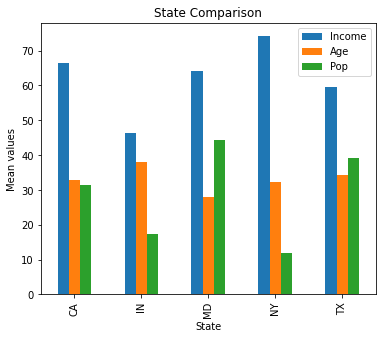



1.   Income per person seems to be highest in NY followed by CA
2.   MD seems to quite populated and younger state
3.   CA has most of its population in 30's
4.   Income polarity seems to be higher in NY







 





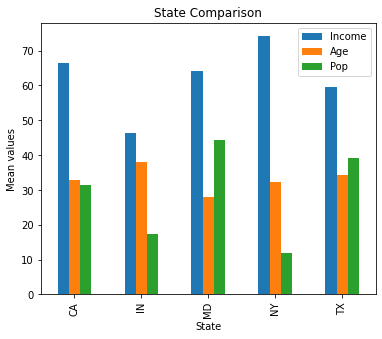

Average age for 'CA'
------------------------
             Age     Income        Pop
count   3.000000   3.000000   3.000000
mean   33.000000  66.333333  31.333333
std     3.464102  12.013881  22.030282
min    29.000000  54.000000  10.000000
25%    32.000000  60.500000  20.000000
50%    35.000000  67.000000  30.000000
75%    35.000000  72.500000  42.000000
max    35.000000  78.000000  54.000000

Average age for 'IN'
------------------------
             Age     Income        Pop
count   3.000000   3.000000   3.000000
mean   38.000000  46.333333  17.333333
std     5.196152  19.629909  10.692677
min    32.000000  35.000000   5.000000
25%    36.500000  35.000000  14.000000
50%    41.000000  35.000000  23.000000
75%    41.000000  52.000000  23.500000
max    41.000000  69.000000  24.000000

Average age for 'MD'
------------------------
             Age     Income        Pop
count  13.000000  13.000000  13.000000
mean   28.076923  64.230769  44.384615
std     5.203549  16.931991  30.845147
mi

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_state(df):
  # convert the values in the Pop column to numbers of 1000s from actual numbers (rounded)
  df['Pop'] = (df['Pop']/1000).round()
  # convert the values in the 'Pop' column to int64
  df['Pop'] = df['Pop'].astype(int)
  return df

def clean_county(df):
  # Add a new column called 'Pop' to the county_level_df dataframe
  df['Pop'] = df['Population']
  # Drop the 'Population' column 
  df.drop('Population', axis=1, inplace=True)
  return df

def get_income_df():
  excel_url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
  
  # 1. Read the three sheets into the dataframes
  county_level_df = pd.read_excel(excel_url, sheet_name='county-level')
  state_level_df = pd.read_excel(excel_url, sheet_name='state-level')
  income_new_df = pd.read_excel(excel_url, sheet_name='income')

  # 2. Cleanup Population column
  clean_county(county_level_df)
  
  # 3. Cleanup Pop column
  clean_state(state_level_df)

  # 4. Combine two df
  df_to_concat = [county_level_df, state_level_df]
  county_state_combined_df = pd.concat(df_to_concat, ignore_index=True, join='inner')
  
  # 5. Append income_df to the combined dataframe
  income_df = county_state_combined_df.append(income_new_df, ignore_index=True)
  return income_df

def calculate_stat():
  # 1. Run the function get_income_df() and store the result in a new dataframe called income_df.
  income_df = get_income_df()

  # 2. Group income_df by State and calculate some statistics on the groups.
  # Now the index will be state names
  df_groupby_state = income_df.groupby('State')

  # To get an overview of stats per state
  for state, frame in df_groupby_state:
    print(f"Average age for {state!r}")
    print("------------------------")
    print(frame.describe(), end="\n\n")

  df_groupby_state[['Income', 'Age', 'Pop']].mean().plot(kind='bar', title='State Comparison', ylabel='Mean values', xlabel='State', figsize=(6, 5))
  plt.show()

  # 3. Add a description, in the cell below, of what the statistics show and why in the text box.
  # Income per person seems to be highest in NY followed by CA.
  # MD seems to quite populated and younger state
  # CA has most of its population in 30's. 
  # Income polarity seems to be higher in NY
  

# Please ignore this function (mainly for my learning)
def calculate_stat1():
  # 1. Run the function get_income_df() and store the result in a new dataframe called income_df.
  income_df = get_income_df()

  # 2. Group income_df by State and calculate some statistics on the groups.
  # Just to see what kinda data is in State?
  #for i in income_df['State'].unique():
  #  print(i)
    
  #print(income_df['State'].value_counts())

  # This prints all cells belonging to each State
  #for name, group in income_df.groupby('State'):
  #  print(name, group)
  
  # Now the index will be state names
  df_groupby_state = income_df.groupby('State')

  #for state, frame in df_groupby_state:
  #  print(f"First 2 entries for {state!r}")
  #  print("------------------------")
   # print(frame.head(2), end="\n\n")

  # To get a particular group
  #print(df_groupby_state.get_group('TX'))

  #for state, frame in df_groupby_state:
  #  print(f"Average age for {state!r}")
  #  print("------------------------")
  #  print(frame['Age'].mean(), end="\n\n")

  #print(df_groupby_state.describe())
  
  # To get an overview of stats per state
  #for state, frame in df_groupby_state:
  #  print(f"Average age for {state!r}")
  #  print("------------------------")
  #  print(frame.describe(), end="\n\n")

  # Plot one state data
  #df_groupby_state.get_group('MD').plot()

  # This plots each key for each state together
  #df_groupby_state.plot(kind='bar')
  #plt.show()

  # Have a look at index, its not by State name but as 0,1,2...
  df_groupby_state_no_idx = income_df.groupby('State', as_index=False) #.apply(display)
  #print(df_groupby_state_no_idx.info)
  #for state, frame in df_groupby_state_no_idx:
   # print(f"First 2 entries for {state!r}")
   # print("------------------------")
   # print(frame.head(2), end="\n\n")

  #Does not work plt.bar(df_groupby_state_no_idx['Age'], df_groupby_state_no_idx['Income'])

  # FIXME Learn how to plot all keys using some sort of iteration?
  # This works
  #df_groupby_state['Age'].mean().plot(kind='bar', title='Age Comparison', ylabel='Mean Age', xlabel='State', figsize=(6, 5), color="green")
  # .plot is only plotting the plot, its not gonna show (except for the last plot)
  # If .show() is not called, only last plot will be shown. 
  #plt.show()
  #df_groupby_state['Pop'].mean().plot(kind='bar', title='Population Comparison', ylabel='Mean pop', xlabel='State', figsize=(6, 5), color="indigo")
  #plt.show()
  #df_groupby_state['Income'].mean().plot(kind='bar', title='Income Comparison', ylabel='Mean income', xlabel='State', figsize=(6, 5), color="orange")
  #plt.show()

  df_groupby_state[['Income', 'Age', 'Pop']].mean().plot(kind='bar', title='Income Comparison', ylabel='Mean income', xlabel='State', figsize=(6, 5))
  plt.show()

  # Correlation FIXME Understand how to extract info from it
  #state_corr = df_groupby_state.corr()
  #print(state_corr)
  #print(state_corr.describe())


  # 3. Add a description, in the cell below, of what the statistics show and why in the text box.
  
  


calculate_stat()
